In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import fbeta_score
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [2]:
bcancer=datasets.load_breast_cancer()

X = pd.DataFrame(bcancer.data, columns=bcancer.feature_names)
y=pd.DataFrame(bcancer.target)

In [3]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x108311898>,
      dtype=object)

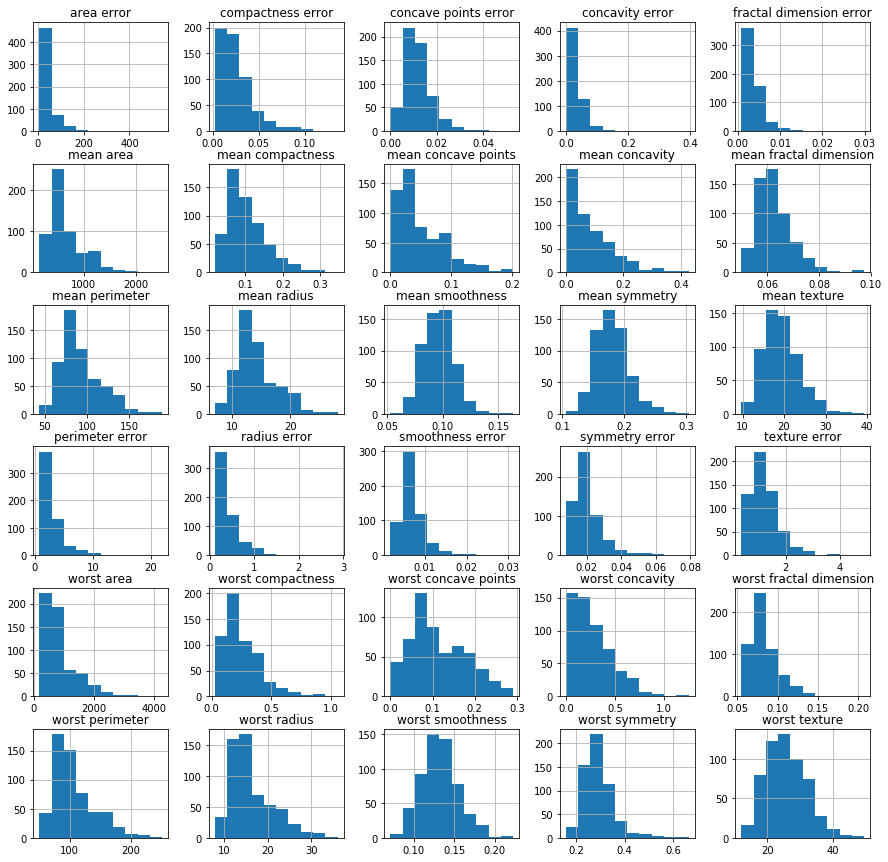

In [4]:
X.hist(figsize=(15,15))

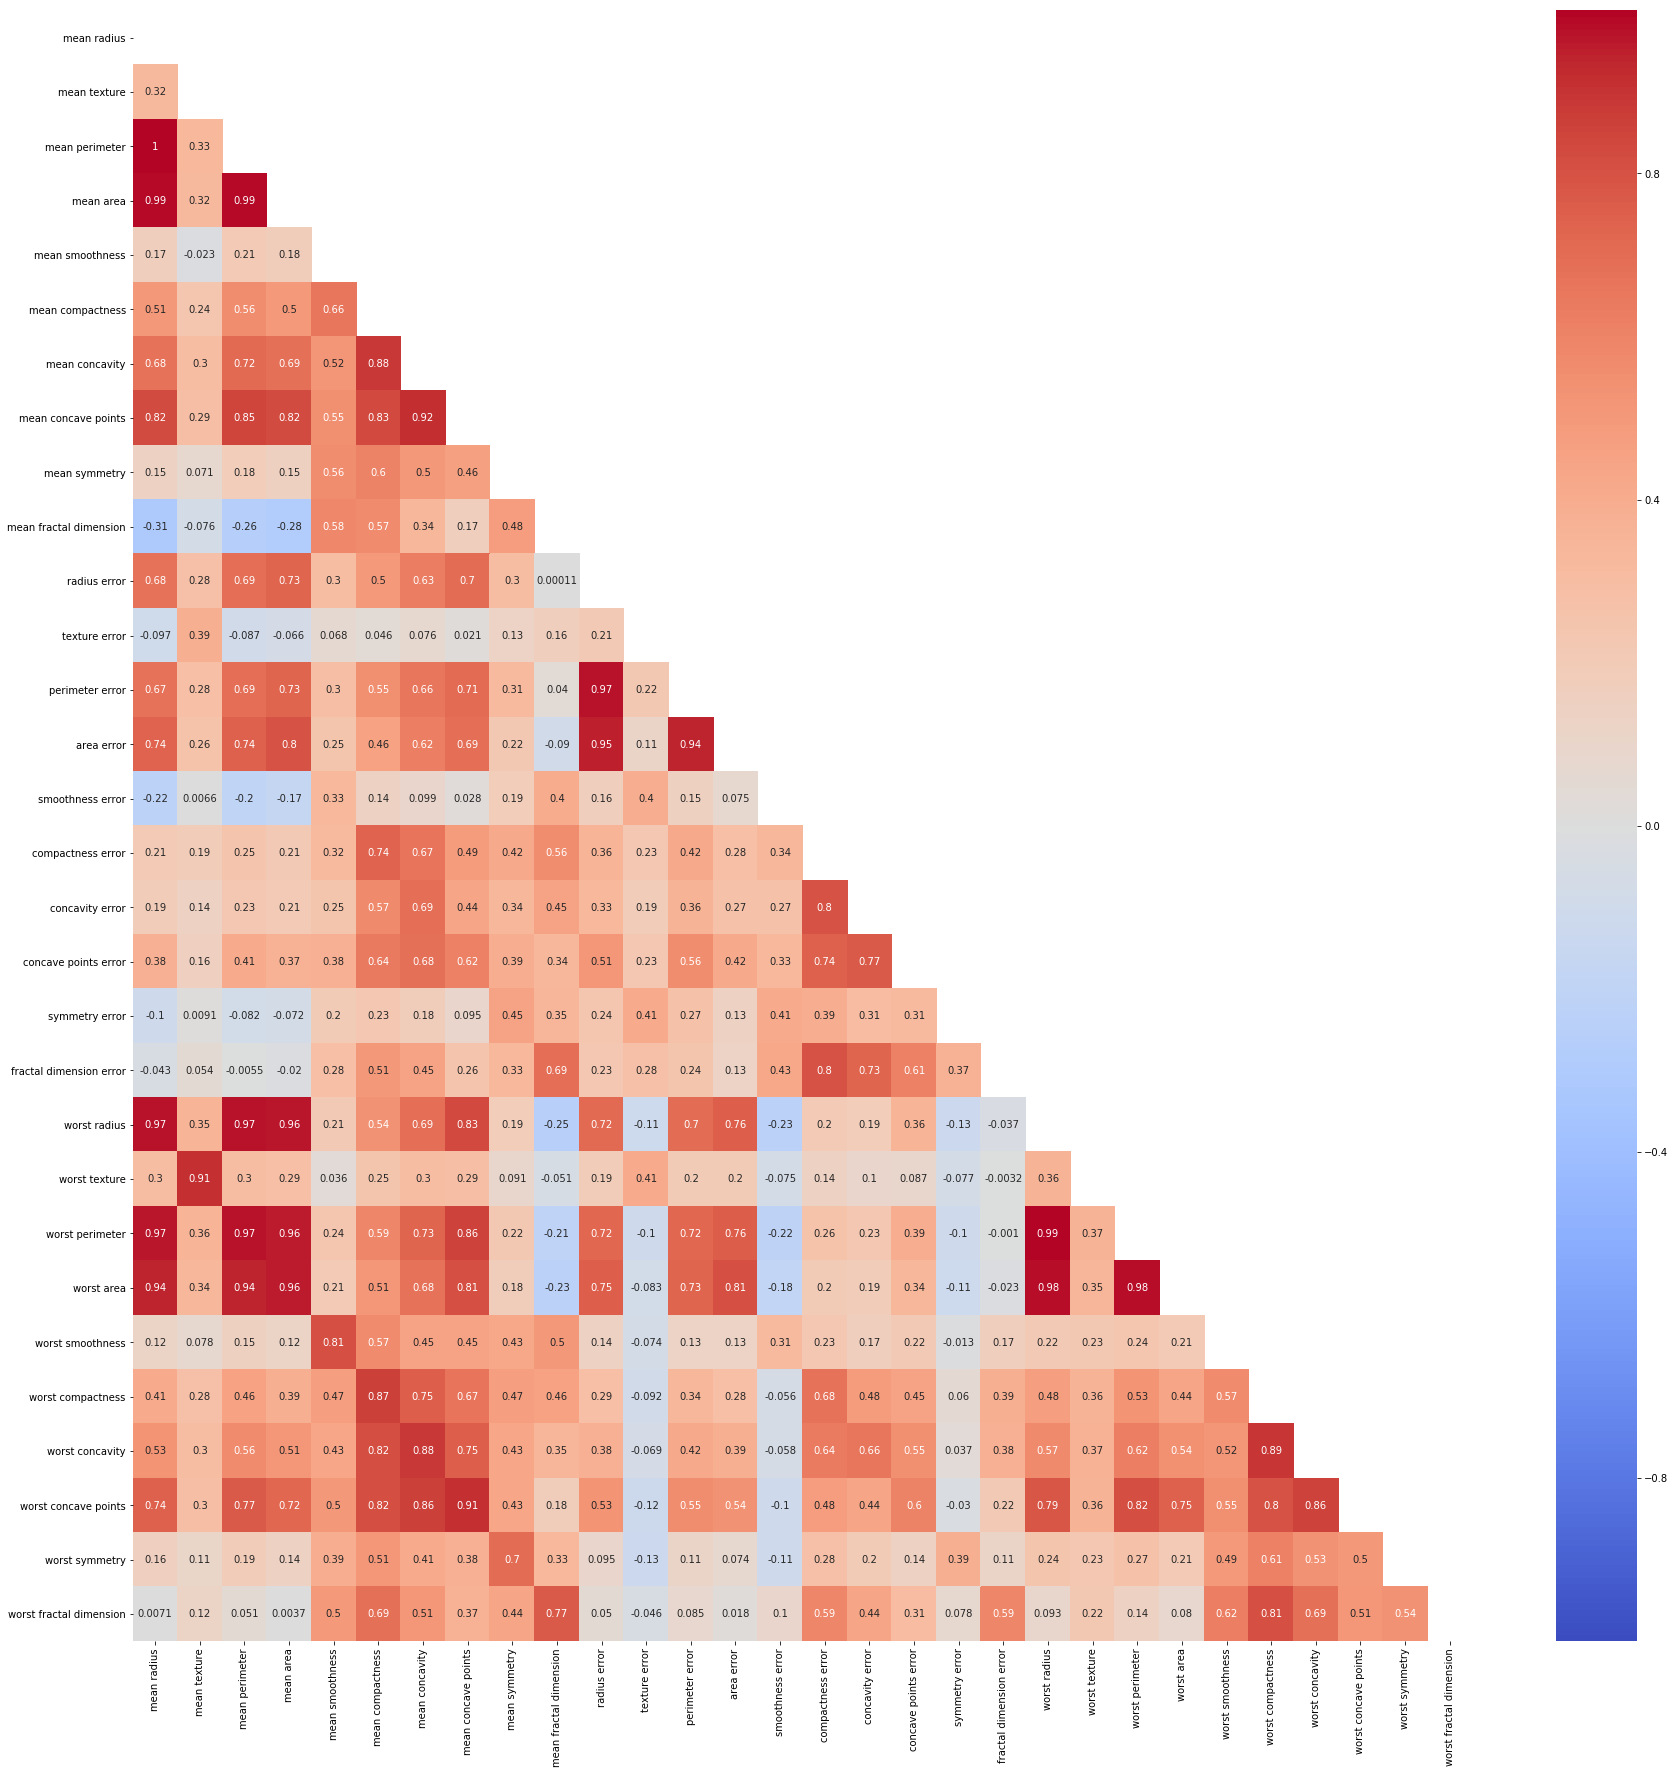

In [5]:
mask = np.zeros_like(X.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(30,30))        
sns.heatmap(X.corr(), 
            vmin = -1,
            cmap='coolwarm',
            annot=True,
            mask=mask)
plt.show()

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

Dropping few variables as they are strongly linearly correlated.

In [7]:
X=X.drop(['mean perimeter','mean area','worst radius','worst perimeter','worst area','perimeter error','area error'],axis=1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [9]:
sc = StandardScaler() 
XtrainSc=sc.fit_transform(X_train)
XtestSc=sc.transform(X_test)

In [10]:
gamma = [1,0.1,0.01,0.001]
C= [0.1,1, 10,100]
degree=[2,4,6,8,10,12,14]

In [11]:
def plotParams(kernel):
  fbeta1=[]
  fbeta2=[]

  if(kernel=='rbf'):
    for i in gamma:
      svc = SVC(kernel='rbf',gamma=i)
      svc.fit(XtrainSc,y_train)
      fbeta1.append(fbeta_score(y_test, svc.predict(XtestSc), beta=2, pos_label=0, average='binary'))
    for i in C:
      svc = SVC(kernel='rbf',C=i)
      svc.fit(XtrainSc,y_train)
      fbeta2.append(fbeta_score(y_test, svc.predict(XtestSc), beta=2, pos_label=0, average='binary'))
    plt.xlabel('Gamma')
    plt.ylabel('Test F2 Score')
    plt.plot(gamma,fbeta1)
    plt.title('RBF')  
    plt.show()
    plt.xlabel('C')
    plt.ylabel('Test F2 Score')
    plt.plot(C,fbeta2)
    plt.title('RBF') 
    plt.show()
  else:
    for i in degree:
      svc = SVC(kernel='poly',degree=i)
      svc.fit(XtrainSc,y_train)
      fbeta1.append(fbeta_score(y_test, svc.predict(XtestSc), beta=2, pos_label=0, average='binary'))
    for i in C:
      svc = SVC(kernel='poly',C=i)
      svc.fit(XtrainSc,y_train)
      fbeta2.append(fbeta_score(y_test, svc.predict(XtestSc), beta=2, pos_label=0, average='binary'))
    plt.xlabel('Degree')
    plt.ylabel('Test F2 Score')
    plt.plot(degree,fbeta1)
    plt.title('Poly')  
    plt.show()
    plt.xlabel('C')
    plt.ylabel('Test F2 Score')
    plt.plot(C,fbeta2)
    plt.title('Poly') 
    plt.show() 

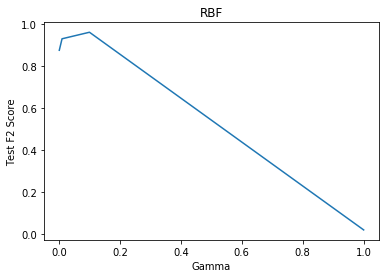

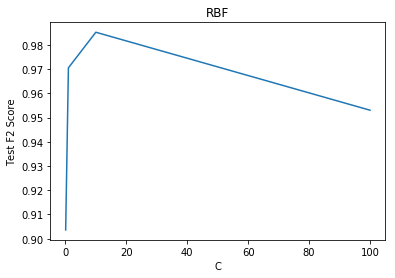

In [12]:
plotParams('rbf')

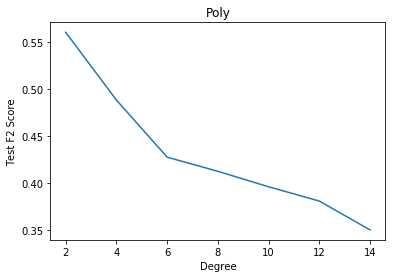

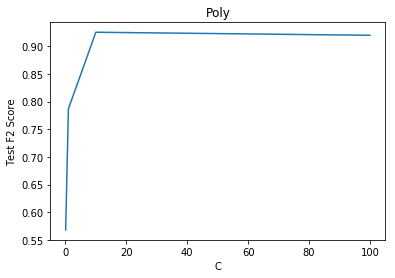

In [13]:
plotParams('poly')

In [14]:
param_grid_rbf = {'C': C,'gamma': gamma,'kernel': ['rbf']}
param_grid_poly = {'C': C,'degree': degree,'kernel': ['poly']}

In [15]:
def gridSearch(kernel):
  if(kernel=='rbf'):
    grid_model = GridSearchCV(SVC(), param_grid_rbf, refit = True,cv=5, n_jobs=-1)
    grid_model.fit(XtrainSc,y_train)  
    print('Best Params are:',grid_model.best_params_)
    print('F2 Score is:',fbeta_score(y_test, grid_model.predict(XtestSc),beta=2))
    sns.heatmap(confusion_matrix(y_test, grid_model.predict(XtestSc)),annot=True)
    print('\n')
    print(classification_report(y_test, grid_model.predict(XtestSc)))
    plt.title('RBF')

  else:
    grid_model = GridSearchCV(SVC(), param_grid_poly, refit = True,cv=5, n_jobs=-1)
    grid_model.fit(XtrainSc,y_train)  
    print('Best Params are:',grid_model.best_params_)
    print('F2 Score is:',fbeta_score(y_test, grid_model.predict(XtestSc),beta=2))
    print('\n')
    print(classification_report(y_test, grid_model.predict(XtestSc)))
    sns.heatmap(confusion_matrix(y_test, grid_model.predict(XtestSc)),annot=True)
    plt.title('Poly')

Best Params are: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
F2 Score is: 0.9824902723735408


              precision    recall  f1-score   support

           0       0.97      0.99      0.98        68
           1       0.99      0.98      0.99       103

   micro avg       0.98      0.98      0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



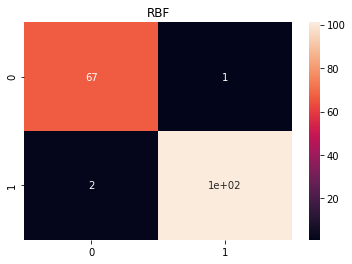

In [16]:
gridSearch('rbf')

Best Params are: {'C': 10, 'degree': 2, 'kernel': 'poly'}
F2 Score is: 0.8895131086142322


              precision    recall  f1-score   support

           0       0.84      0.60      0.70        68
           1       0.78      0.92      0.84       103

   micro avg       0.80      0.80      0.80       171
   macro avg       0.81      0.76      0.77       171
weighted avg       0.80      0.80      0.79       171



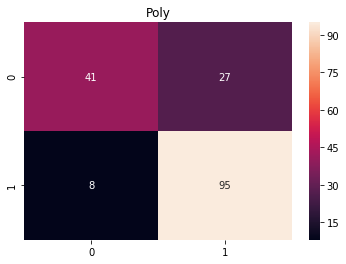

In [17]:
gridSearch('poly')

## Here we can see clearly RBF kernel performs best.

### In order to avoid false negative we should focus on the  ***Precision*** metric and should try to increase that.


### **Precision=TP/(TP+FP)**

### To have higher precision we can keep increasing the decision threshold until we reach and satisfactory value of high enough value of precision balanced with respect to recall.